# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [215]:
#Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from google.colab import files

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [216]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut

url = "https://raw.githubusercontent.com/sahrul3114/Submission-Belajar-Machine-Learning-Untuk-Pemula/main/BMLP_Syahrul%20Akbar%20Ramdhani-Siswa/data_clustering.csv"
df = pd.read_csv(url)

In [217]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceFirst,DaysSincePrev,TransactionHour,TransactionDayOfWeek,TransactionMonth,AgeGroup,BalanceGroup,Target
0,0.008428,1,36,0,0.838710,0,0.244828,0.0,0.336832,0.271978,0.728022,0.0,0.25,0.272727,1,2,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,0.483516,0.516484,0.0,0.25,0.454545,1,0,0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,0.519231,0.480769,1.0,0.00,0.545455,2,1,0
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,0.337912,0.662088,0.0,1.00,0.363636,2,0,1
4,0.008428,0,1,2,0.435484,3,0.648276,0.0,0.492591,0.788462,0.211538,0.5,0.00,0.818182,0,0,2


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [218]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Split dulu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2011, 16), y_train=(2011,)
Test set shape: X_test=(503, 16), y_test=(503,)


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

Training Model selesai

==== Decision Tree Classifier ====
Confusion Matrix:
[[172   0   0]
 [  0 169   0]
 [  0   0 162]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       169
           2       1.00      1.00      1.00       162

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

Accuracy: 1.0000

----------------------------------------



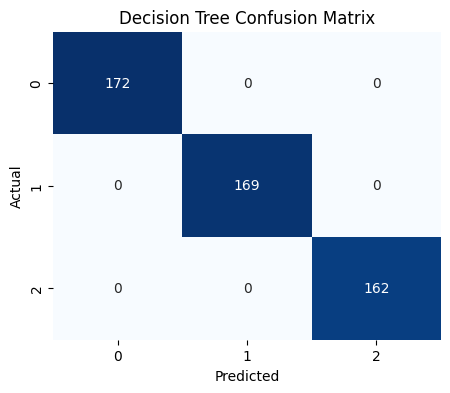

In [219]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)

print('Training Model selesai\n')

y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)

# Use classification_report for multiclass evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Use accuracy_score for overall accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")

print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [220]:
# Menyimpan Model
import joblib
joblib.dump(dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [221]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
lr = LogisticRegression().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training selesai.


In [222]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

# Fungsi evaluasi multi-clasS
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    results = {
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred, digits=4)
    }
    return results

# Evaluasi semua model
results = {
    'Logistic Regression (LR)': evaluate_model(lr, X_test, y_test),
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Ringkasan skor
summary_df = pd.DataFrame([
    {
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for name, metrics in results.items()
])

summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (LR),0.956262,0.956412,0.956262,0.956315
1,K-Nearest Neighbors (KNN),0.986083,0.986218,0.986083,0.986111
2,Decision Tree (DT),1.000000,1.000000,1.000000,1.000000
3,Random Forest (RF),1.000000,1.000000,1.000000,1.000000
4,Support Vector Machine (SVM),1.000000,1.000000,1.000000,1.000000
5,Naive Bayes (NB),0.992048,0.992096,0.992048,0.992048


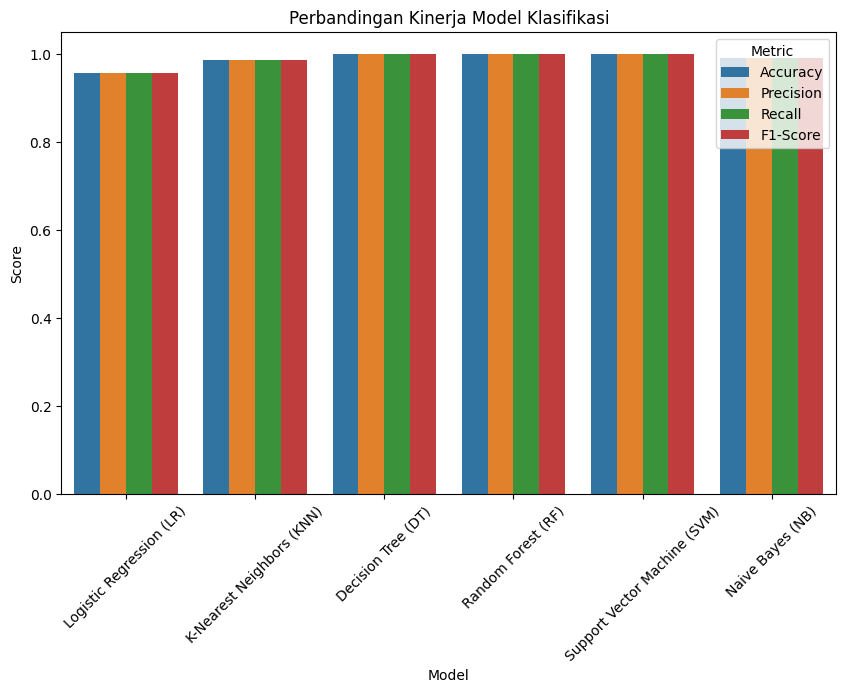

In [223]:
# Visualisasi perbandingan
plt.figure(figsize=(10,6))
sns.barplot(data=summary_df.melt(id_vars="Model",
                                 value_vars=["Accuracy","Precision","Recall","F1-Score"]),
            x="Model", y="value", hue="variable")
plt.title("Perbandingan Kinerja Model Klasifikasi")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()

In [224]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu

# Simpan Logistic Regression
joblib.dump(lr, 'explore_LogisticRegression_classification.h5')

# Simpan Random Forest
joblib.dump(rf, 'explore_RandomForest_classification.h5')

# Simpan SVM
joblib.dump(svm, 'explore_SVM_classification.h5')

# Simpan KNN
joblib.dump(knn, 'explore_KNN_classification.h5')

# Simpan Naive Bayes
joblib.dump(nb, 'explore_NaiveBayes_classification.h5')

['explore_NaiveBayes_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [225]:
# Parameter grid yang valid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# GridSearch dengan cross-validation
grid = GridSearchCV(
    LogisticRegression(max_iter=5000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score (Accuracy):", grid.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best CV Score (Accuracy): 1.0



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       169
           2       1.00      1.00      1.00       162

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



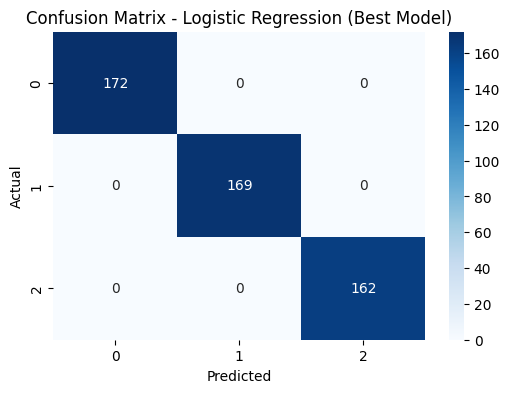

In [226]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
# Evaluasi di test set
# Evaluasi di data test
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=set(y_test),
            yticklabels=set(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Best Model)")
plt.show()

In [227]:
# Menyimpan Model hasil tuning
joblib.dump(best_model, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code